<a href="https://colab.research.google.com/github/MostakChy055/Code-MLDL/blob/main/Vegetable_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle.json'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 98% 525M/534M [00:05<00:00, 137MB/s] 
100% 534M/534M [00:05<00:00, 98.5MB/s]


In [ ]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

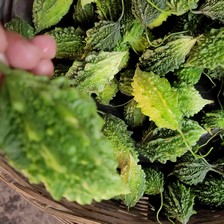

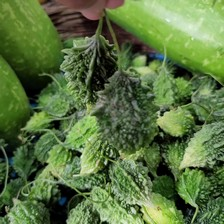

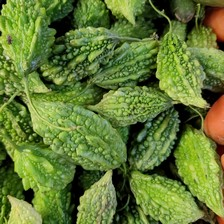

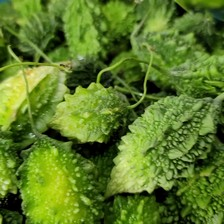

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import warnings
from google.colab.patches import cv2_imshow
warnings.filterwarnings("ignore")

def getImages(imageFolder):
  imgLst = []

  cnt = 0
  for filename in os.listdir(imageFolder):
    img = cv2.imread(os.path.join(imageFolder, filename))
    cv2_imshow(img)
    imgLst.append(os.path.join(imageFolder, filename))

    cnt += 1
    if cnt == 4:
      break

  return imgLst

imgLst = getImages('/content/Vegetable Images/test/Bitter_Gourd')

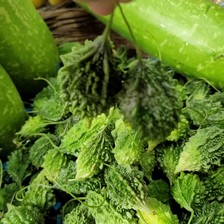

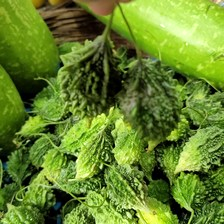

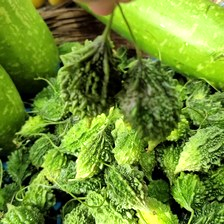

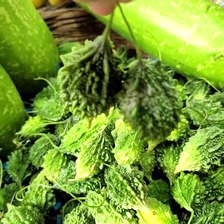

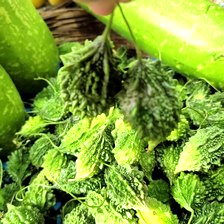

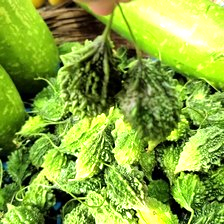

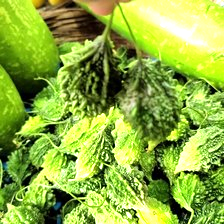

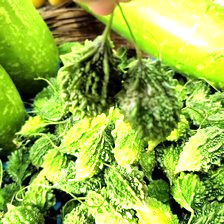

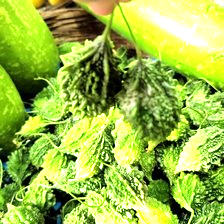

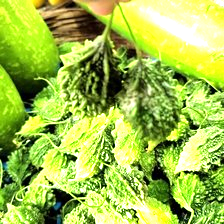

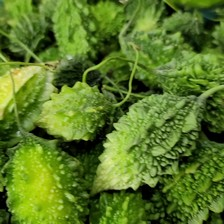

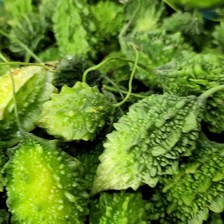

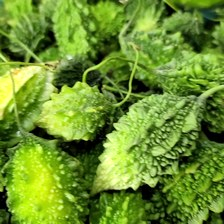

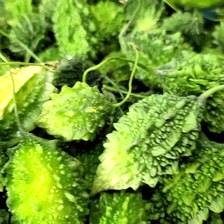

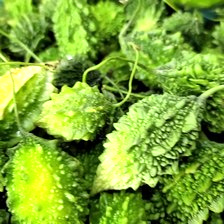

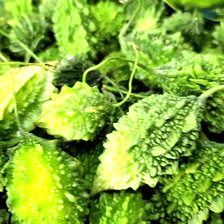

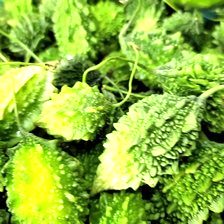

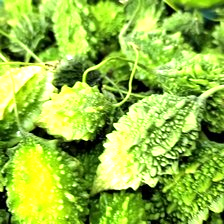

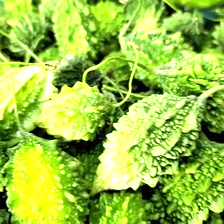

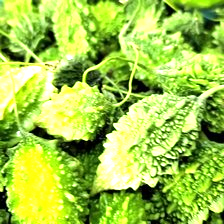

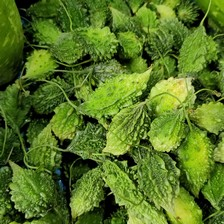

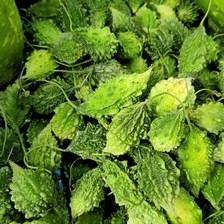

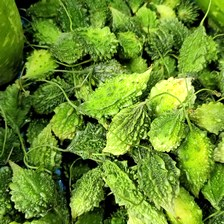

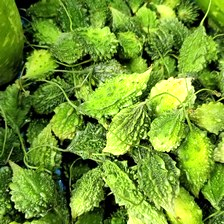

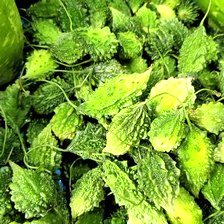

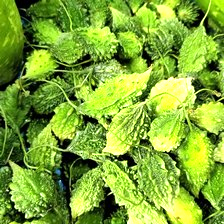

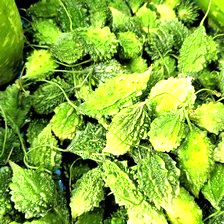

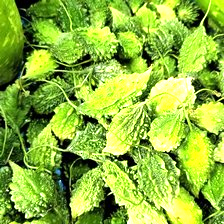

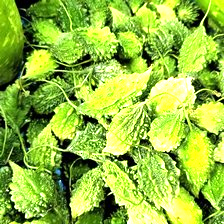

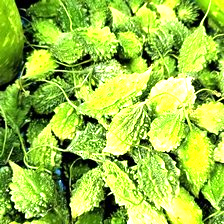

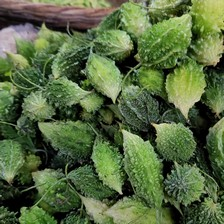

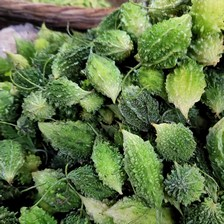

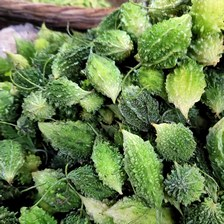

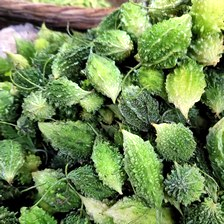

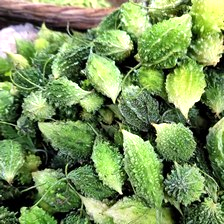

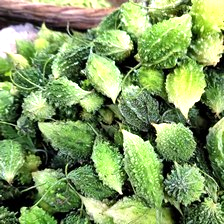

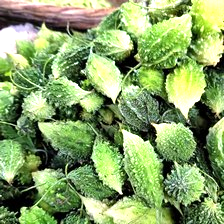

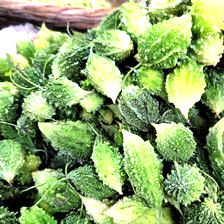

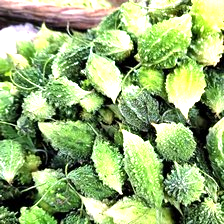

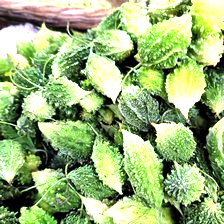

In [ ]:
import cv2

def adjust_contrast(image, alpha):
    new_image = cv2.convertScaleAbs(image, alpha = alpha, beta=0)
    return new_image

for image in imgLst:
  cnt = 0.0
  image = cv2.imread(image)
  for i in range(10):
    adjusted_image = adjust_contrast(image, 1 + cnt)
    cnt += .1
    cv2_imshow(adjusted_image)


 # Increase contrast by 50%

In [ ]:
import cv2

def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

for image in imgLst:
  cnt = 0.0
  image = cv2.imread(image)
  image = sharpen_image(image)
  cv2_imshow(image)

NameError: name 'imgLst' is not defined

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np

def sharpen_image(image):
    # Ensure the image is in uint8 format if it's in float32 or float64
    if image.dtype in [np.float32, np.float64]:
        image = (image * 255).astype(np.uint8)  # Rescale to [0, 255] and convert to uint8

    # Convert the NumPy array to a PIL Image object
    img = Image.fromarray(image)

    # Apply enhancements
    image1 = ImageEnhance.Color(img).enhance(1.35)
    image1 = ImageEnhance.Contrast(image1).enhance(1.25)
    image1 = ImageEnhance.Sharpness(image1).enhance(2.5)

    # Convert the PIL Image back to a NumPy array
    sharpened_image = np.array(image1)

    return sharpened_image

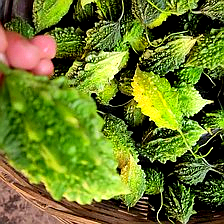

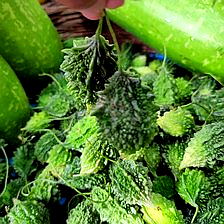

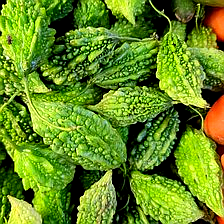

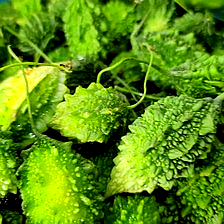

In [ ]:
for img in imgLst:
  image = cv2.imread(img)
  image = sharpen_image(image)
  cv2_imshow(image)

In [ ]:
train_dir = '/content/Vegetable Images/train'
test_dir = '/content/Vegetable Images/test'
validation_dir = '/content/Vegetable Images/validation'

In [ ]:
def count_images(directory):
    categories = os.listdir(directory)
    category_count = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return category_count

train_count = count_images(train_dir)
test_count = count_images(test_dir)
validation_count = count_images(validation_dir)


print(f"Train sample count : {train_count}\n")
print(f"Test sample count : {test_count}\n")
print(f"Validation sample count : {validation_count}")



Train sample count : {'Broccoli': 1000, 'Potato': 1000, 'Bean': 1000, 'Bitter_Gourd': 1000, 'Tomato': 1000, 'Bottle_Gourd': 1000, 'Carrot': 1000, 'Capsicum': 1000, 'Radish': 1000, 'Cabbage': 1000, 'Brinjal': 1000, 'Pumpkin': 1000, 'Papaya': 1000, 'Cucumber': 1000, 'Cauliflower': 1000}

Test sample count : {'Broccoli': 200, 'Potato': 200, 'Bean': 200, 'Bitter_Gourd': 200, 'Tomato': 200, 'Bottle_Gourd': 200, 'Carrot': 200, 'Capsicum': 200, 'Radish': 200, 'Cabbage': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Papaya': 200, 'Cucumber': 200, 'Cauliflower': 200}

Validation sample count : {'Broccoli': 200, 'Potato': 200, 'Bean': 200, 'Bitter_Gourd': 200, 'Tomato': 200, 'Bottle_Gourd': 200, 'Carrot': 200, 'Capsicum': 200, 'Radish': 200, 'Cabbage': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Papaya': 200, 'Cucumber': 200, 'Cauliflower': 200}


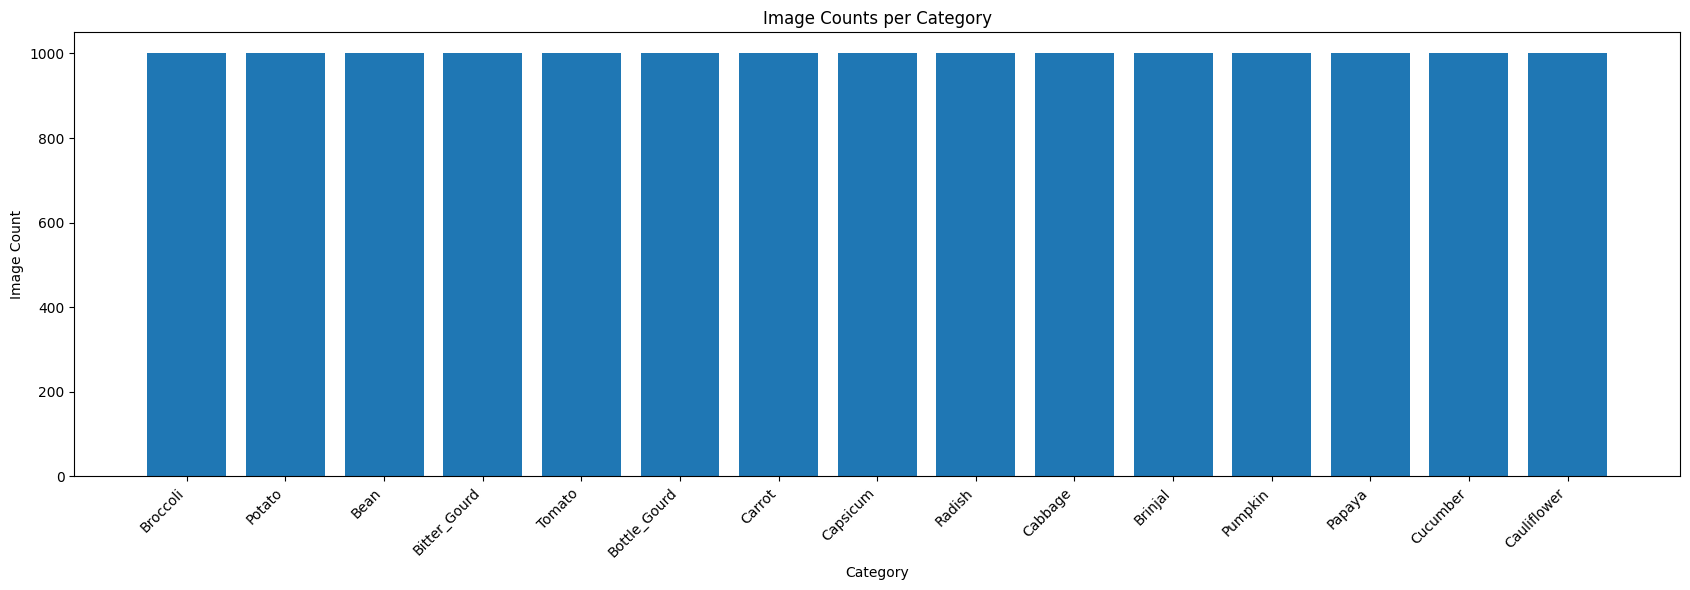

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(17, 6))
plt.bar(train_count.keys(), train_count.values())
plt.title("Image Counts per Category")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class CustomImageDataGenerator(ImageDataGenerator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def flow_from_directory(self, directory, *args, **kwargs):
        generator = super().flow_from_directory(directory, *args, **kwargs)
        return CustomDataGenerator(generator, self)

import numpy as np
import tensorflow as tf

class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator, datagen):
        self.generator = generator
        self.datagen = datagen

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, index):
        batch_x, batch_y = self.generator[index]
        batch_x = np.array([sharpen_image(img) for img in batch_x])
        return batch_x, batch_y

    # Expose samples, batch_size, and class_indices from the original generator
    @property
    def samples(self):
        return self.generator.samples

    @property
    def batch_size(self):
        return self.generator.batch_size

    @property
    def class_indices(self):
        return self.generator.class_indices

    @property
    def filepaths(self):
        return self.generator.filepaths



In [ ]:
# Create instances of the custom data generator
train_datagen = CustomImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = CustomImageDataGenerator(
    rescale=1./255
)

# Load and preprocess training data with sharpening applied
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

# Load and preprocess test data with sharpening applied
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'categorical'
)

validation_set = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
class_map = training_set.class_indices
class_map

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(15, activation='softmax')  # Number of classes
])

from tensorflow.keras.optimizers import Adam

# Change learning rate to a different value, for example, 0.0001
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,460,303 (13.20 MB)

 Trainable params: 3,460,303 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import tensorflow as tf
import numpy as np

checkpoint_dir = "/content/checkpoints"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

class CustomCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir, save_freq):
        super().__init__()
        self.checkpoint_dir = checkpoint_dir
        self.save_freq = save_freq
        self.epoch = 0
        self.batch = 0

    def on_epoch_end(self, epoch, logs=None):
        # Save model state at the end of each epoch
        model_save_path = os.path.join(self.checkpoint_dir, f"model_epoch_{epoch+1}.keras")
        print(f"Saving model and optimizer state for epoch {epoch+1}")
        self.model.save(model_save_path)

        # Save optimizer configuration and variables separately
        optimizer_config = self.model.optimizer.get_config()
        np.save(os.path.join(self.checkpoint_dir, f"optimizer_config_epoch_{epoch+1}.npy"), optimizer_config)
        np.save(os.path.join(self.checkpoint_dir, f"optimizer_weights_epoch_{epoch+1}.npy"), [var.numpy() for var in self.model.optimizer.variables()])
        self.epoch = epoch + 1

    def on_batch_end(self, batch, logs=None):
        self.batch += 1
        if self.batch % self.save_freq == 0:
            model_save_path = os.path.join(self.checkpoint_dir, f"model_epoch_{self.epoch}_batch_{self.batch}.keras")
            print(f"Saving model and optimizer state for epoch {self.epoch}, batch {self.batch}")
            self.model.save(model_save_path)

            # Save optimizer configuration and variables
            optimizer_config = self.model.optimizer.get_config()
            np.save(os.path.join(self.checkpoint_dir, f"optimizer_config_epoch_{self.epoch}_batch_{self.batch}.npy"), optimizer_config)
            np.save(os.path.join(self.checkpoint_dir, f"optimizer_weights_epoch_{self.epoch}_batch_{self.batch}.npy"), [var.numpy() for var in self.model.optimizer.variables()])

# Instantiate the custom callback
save_freq = 100  # Save every 100 batches
custom_checkpoint = CustomCheckpoint(checkpoint_dir, save_freq)

# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=30,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
)


Epoch 1/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 131s 547ms/step - accuracy: 0.8352 - loss: 0.5289 - val_accuracy: 0.8043 - val_loss: 0.6255
Epoch 2/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8281 - loss: 0.5107 - val_accuracy: 0.8214 - val_loss: 0.8335
Epoch 3/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 142s 546ms/step - accuracy: 0.8462 - loss: 0.4804 - val_accuracy: 0.8115 - val_loss: 0.6176
Epoch 4/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.9219 - loss: 0.2377 - val_accuracy: 0.8393 - val_loss: 0.7588
Epoch 5/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 128s 536ms/step - accuracy: 0.8586 - loss: 0.4421 - val_accuracy: 0.8091 - val_loss: 0.6445
Epoch 6/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7969 - loss: 0.5248 - val_accuracy: 0.8036 - val_loss: 0.8194
Epoch 7/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 131s 536ms/step - accuracy: 0.8662 - loss: 0.4155 - val_accuracy: 0.8621 - val_loss: 0.4561
Epoch 8/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9062 - loss: 0

In [ ]:
resume_training = False

if resume_training:
  from tensorflow.keras.models import load_model

  # Load the saved model
  model_save_path = os.path.join(checkpoint_dir, 'model_epoch_2.keras')
  model = load_model(model_save_path)

  # Load the optimizer configuration and weights
  optimizer_config = np.load(os.path.join(checkpoint_dir, 'optimizer_config_epoch_2.npy'), allow_pickle=True).item()
  optimizer_weights = np.load(os.path.join(checkpoint_dir, 'optimizer_weights_epoch_2.npy'), allow_pickle=True)

  # Reconfigure the optimizer
  model.optimizer = tf.keras.optimizers.Adam.from_config(optimizer_config)
  model.optimizer.set_weights(optimizer_weights)



In [ ]:
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=20,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size,
    callbacks=[custom_checkpoint]
)


Epoch 1/20


AttributeError: 'Adam' object has no attribute 'get_weights'

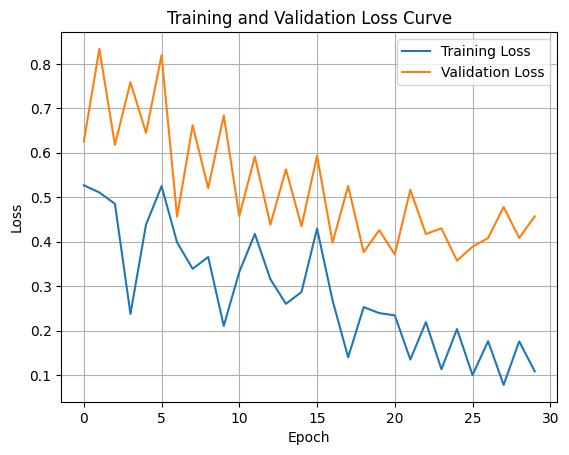

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()

# Customize the plot (optional)
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.show()

array([[[106, 101, 103],
        [ 85,  82,  84],
        [ 75,  71,  77],
        ...,
        [ 74, 131, 122],
        [ 43, 100,  92],
        [  6,  65,  57]],

       [[106, 101, 103],
        [ 85,  82,  84],
        [ 65,  61,  67],
        ...,
        [ 81, 138, 129],
        [ 73, 133, 123],
        [ 90, 150, 140]],

       [[103,  98, 100],
        [ 87,  84,  86],
        [ 59,  55,  61],
        ...,
        [ 99, 157, 146],
        [113, 173, 162],
        [107, 169, 157]],

       ...,

       [[ 69,  72,  86],
        [ 71,  74,  88],
        [ 69,  74,  89],
        ...,
        [ 38,  55,  74],
        [ 38,  55,  74],
        [ 40,  57,  76]],

       [[ 62,  66,  77],
        [ 66,  70,  81],
        [ 73,  79,  92],
        ...,
        [ 25,  44,  65],
        [ 23,  42,  63],
        [ 24,  43,  64]],

       [[ 65,  69,  80],
        [ 65,  69,  80],
        [ 70,  76,  89],
        ...,
        [ 16,  37,  58],
        [ 22,  41,  62],
        [ 28,  47,  68]]], dtype=uint8)
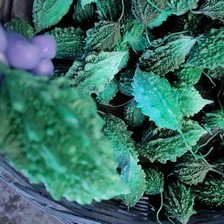

In [ ]:
img = imgLst[0]
img = cv2.imread(img)
img

In [ ]:
import numpy as np
import cv2

img_path = '/content/Vegetable Images/test/Bean/0001.jpg'  # Replace with the actual image path
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load image from {img_path}")
else:
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)

    predicted_class = np.argmax(prediction)

    class_labels = list(training_set.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    print(f"Predicted vegetable type: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted vegetable type: Bean


NameError: name 'cv2_imshow' is not defined